In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# 2. Load Dataset
df = pd.read_csv('Pertanian_Peternakan.csv')

In [29]:
# 3. Exploratory Data Analysis
print(df.head())
print(df["Jenis Komoditas"].value_counts())

   ID Jenis Komoditas  Luas Lahan (ha)  Produksi (ton)  Jumlah Ternak (ekor)  \
0   1            Sapi             0.00            0.00                   769   
1   2         Kedelai             0.96            5.24                     0   
2   3          Jagung             0.64            1.84                     0   
3   4            Sapi             0.00            0.00                   584   
4   5    Ayam Petelur             0.00            0.00                   235   

   Berat Rata-rata Ternak (kg)  Umur Panen (hari)  
0                       391.30                  0  
1                         0.00                114  
2                         0.00                 94  
3                       379.80                  0  
4                         1.95                150  
Jenis Komoditas
Kedelai          171
Padi             166
Jagung           158
Ayam Petelur     136
Kambing          131
Sapi             119
Ayam Pedaging    119
Name: count, dtype: int64


In [30]:
# 4. Encoding dan Feature Selection
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Jenis Komoditas"])
X = df[["Luas Lahan (ha)", "Produksi (ton)", "Jumlah Ternak (ekor)",
        "Berat Rata-rata Ternak (kg)", "Umur Panen (hari)"]]
y = df["Label"]

In [31]:
# 5. Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [33]:
# 7. Decision Tree Modeling
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [38]:
# 8. Evaluation
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc:.2f}")
print("Classification")

Akurasi: 0.66
Classification


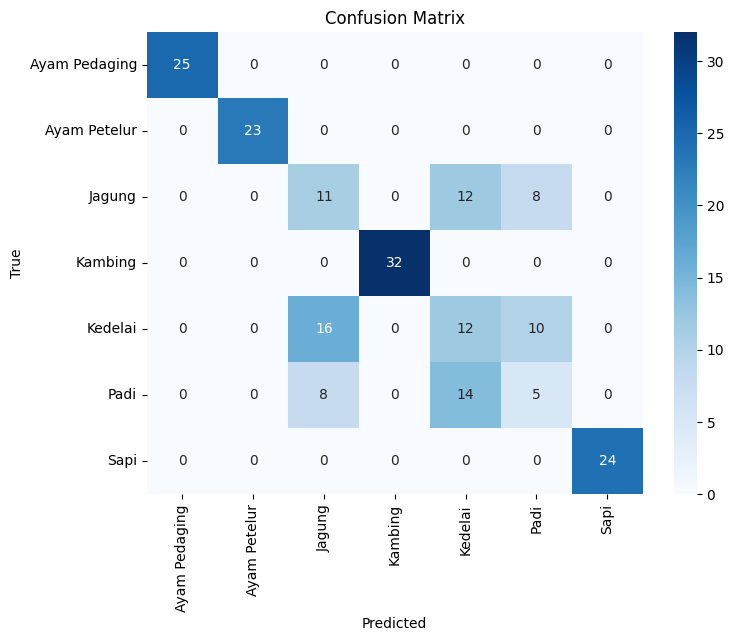

In [36]:
# 9. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

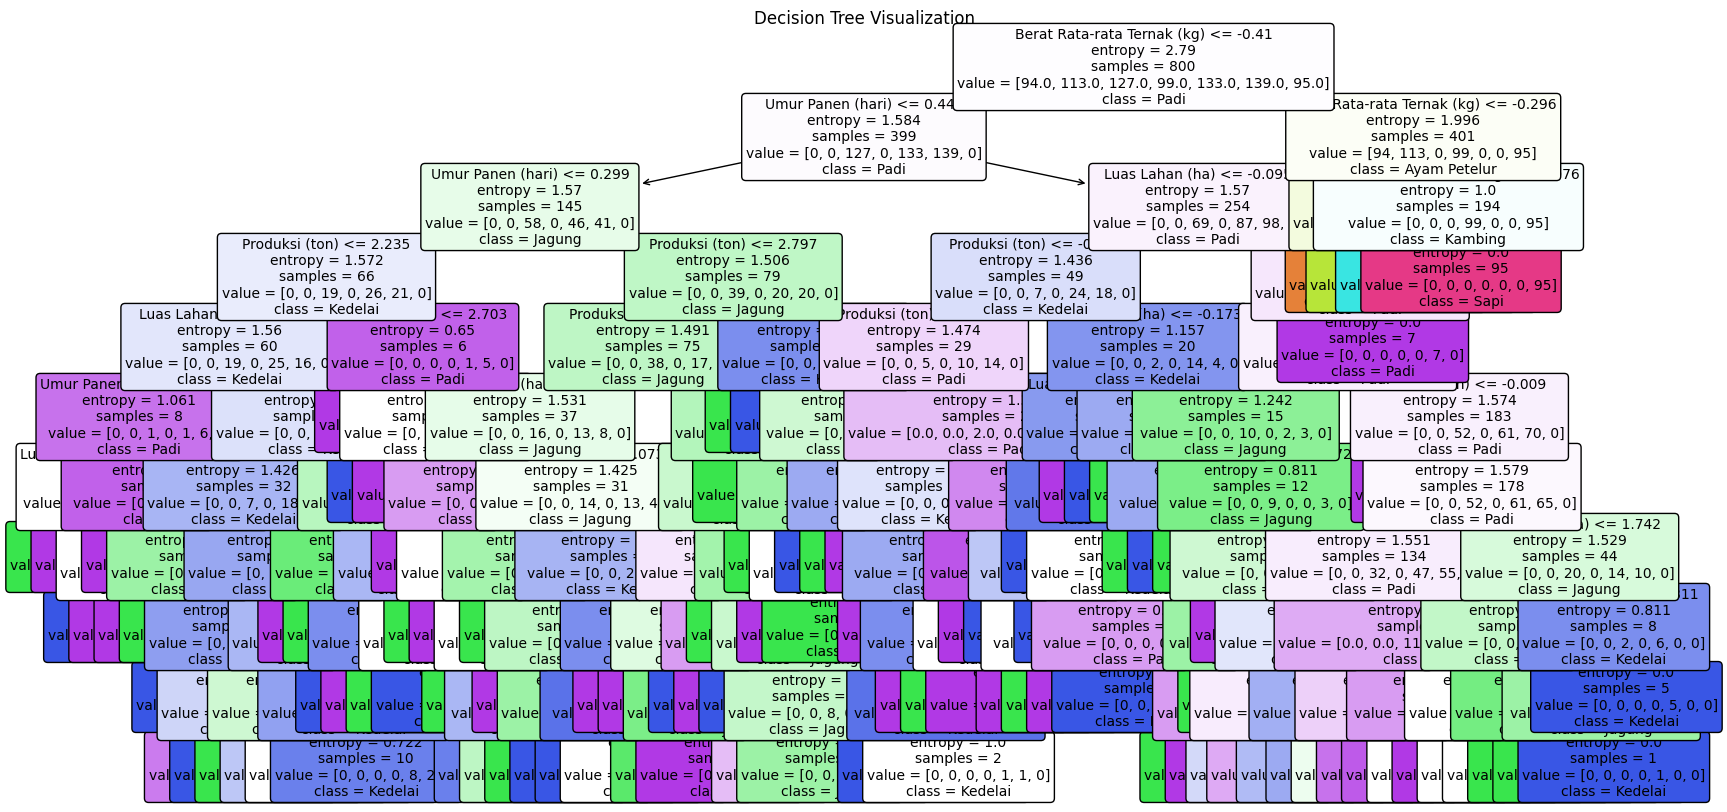

In [37]:
# 10. Visualisasi Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()